In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<H1>Задание 1: Добавление датасета "apple_quality.csv"</H1>

In [2]:
data = pd.read_csv("apple_quality.csv")

<h1>Задание 2: Цель нашей задачи - провести анализ датасета, найти зависимости переменных друг от друга.</h1>

In [3]:
# Найдем переменные датасета
print(data.columns)

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')


In [4]:
# Целевое событие: непрерывное либо дискретное?
data.head()
data.tail()

# Ответ: Непрерывное, содержит значение с дробью, точные данные

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


<h1>Задание 3: Строим распределение целевой переменной</h1>

In [5]:
# Разделение на Features и Target
x = data.iloc[:, :-2]
y = data.iloc[:, -2]



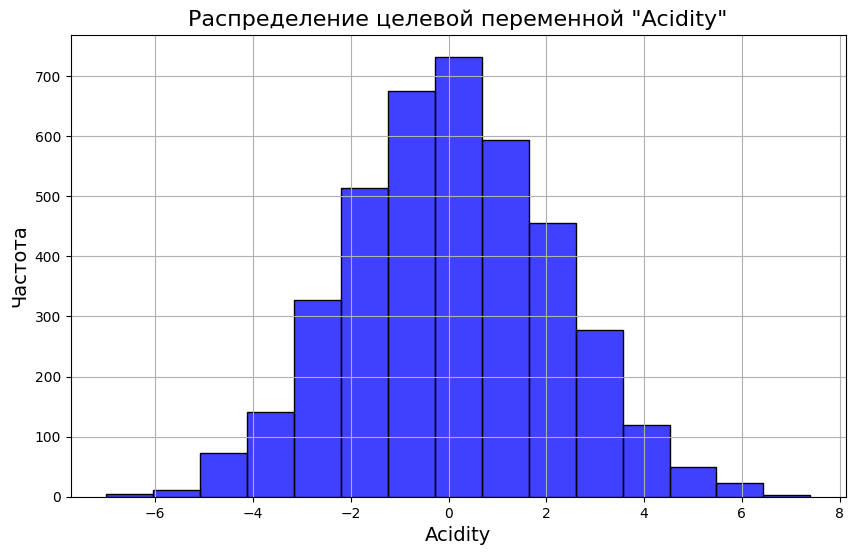

In [6]:
target_var = pd.to_numeric(y, errors="coerce")

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
sns.histplot(target_var, kde=False, bins=15, color='blue')
plt.title('Распределение целевой переменной "Acidity"', fontsize=16)
plt.xlabel('Acidity', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.grid(True)
plt.show()

In [7]:
# Выведем количество уникальных целевых переменных

data["Acidity"].nunique()

4001

*Задание 4: Выводим основные статистики переменных*

In [8]:
data.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


Задание 5: Вывод основной информации

In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB
None


Задание 6: Подсчет количества пропусков

In [10]:
# Подсчёт количества пропусков в каждой колонке
missing_counts = data.isnull().sum()

print("Количество пропусков в каждой колонке:")
print(missing_counts)

Количество пропусков в каждой колонке:
A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64


Задание 7: Построение гистограмм для первых 5 числовых признаков

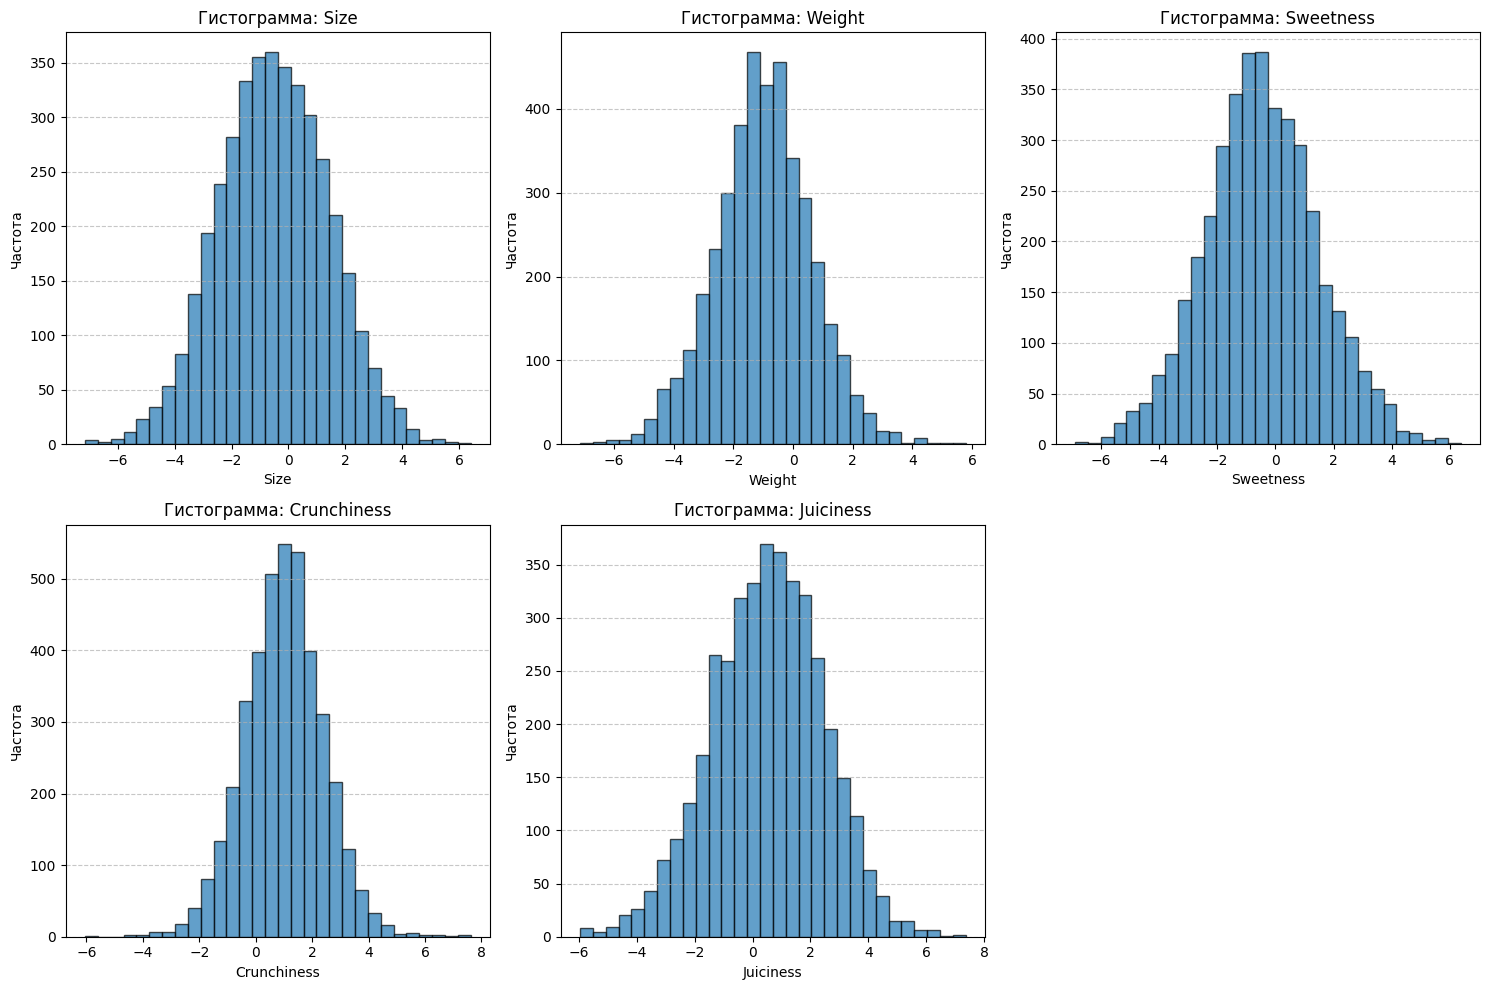

In [11]:
# Построение гистограмм для первых 5 числовых признаков
numeric_columns = data.select_dtypes(include='number').columns[1:6]

# Построение графиков
plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(data[column].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Гистограмма: {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Задание 8: Вывод графиков зависимости переменных

C:\Users\itisd\AppData\Local\Temp\ipykernel_26036\3453425307.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=var, ax=axes[i], palette="Set2")
C:\Users\itisd\AppData\Local\Temp\ipykernel_26036\3453425307.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=var, ax=axes[i], palette="Set2")
C:\Users\itisd\AppData\Local\Temp\ipykernel_26036\3453425307.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=var, ax=axes[i], palette="Set2")
C:\Users\itisd\AppData\Local\Temp\ipy

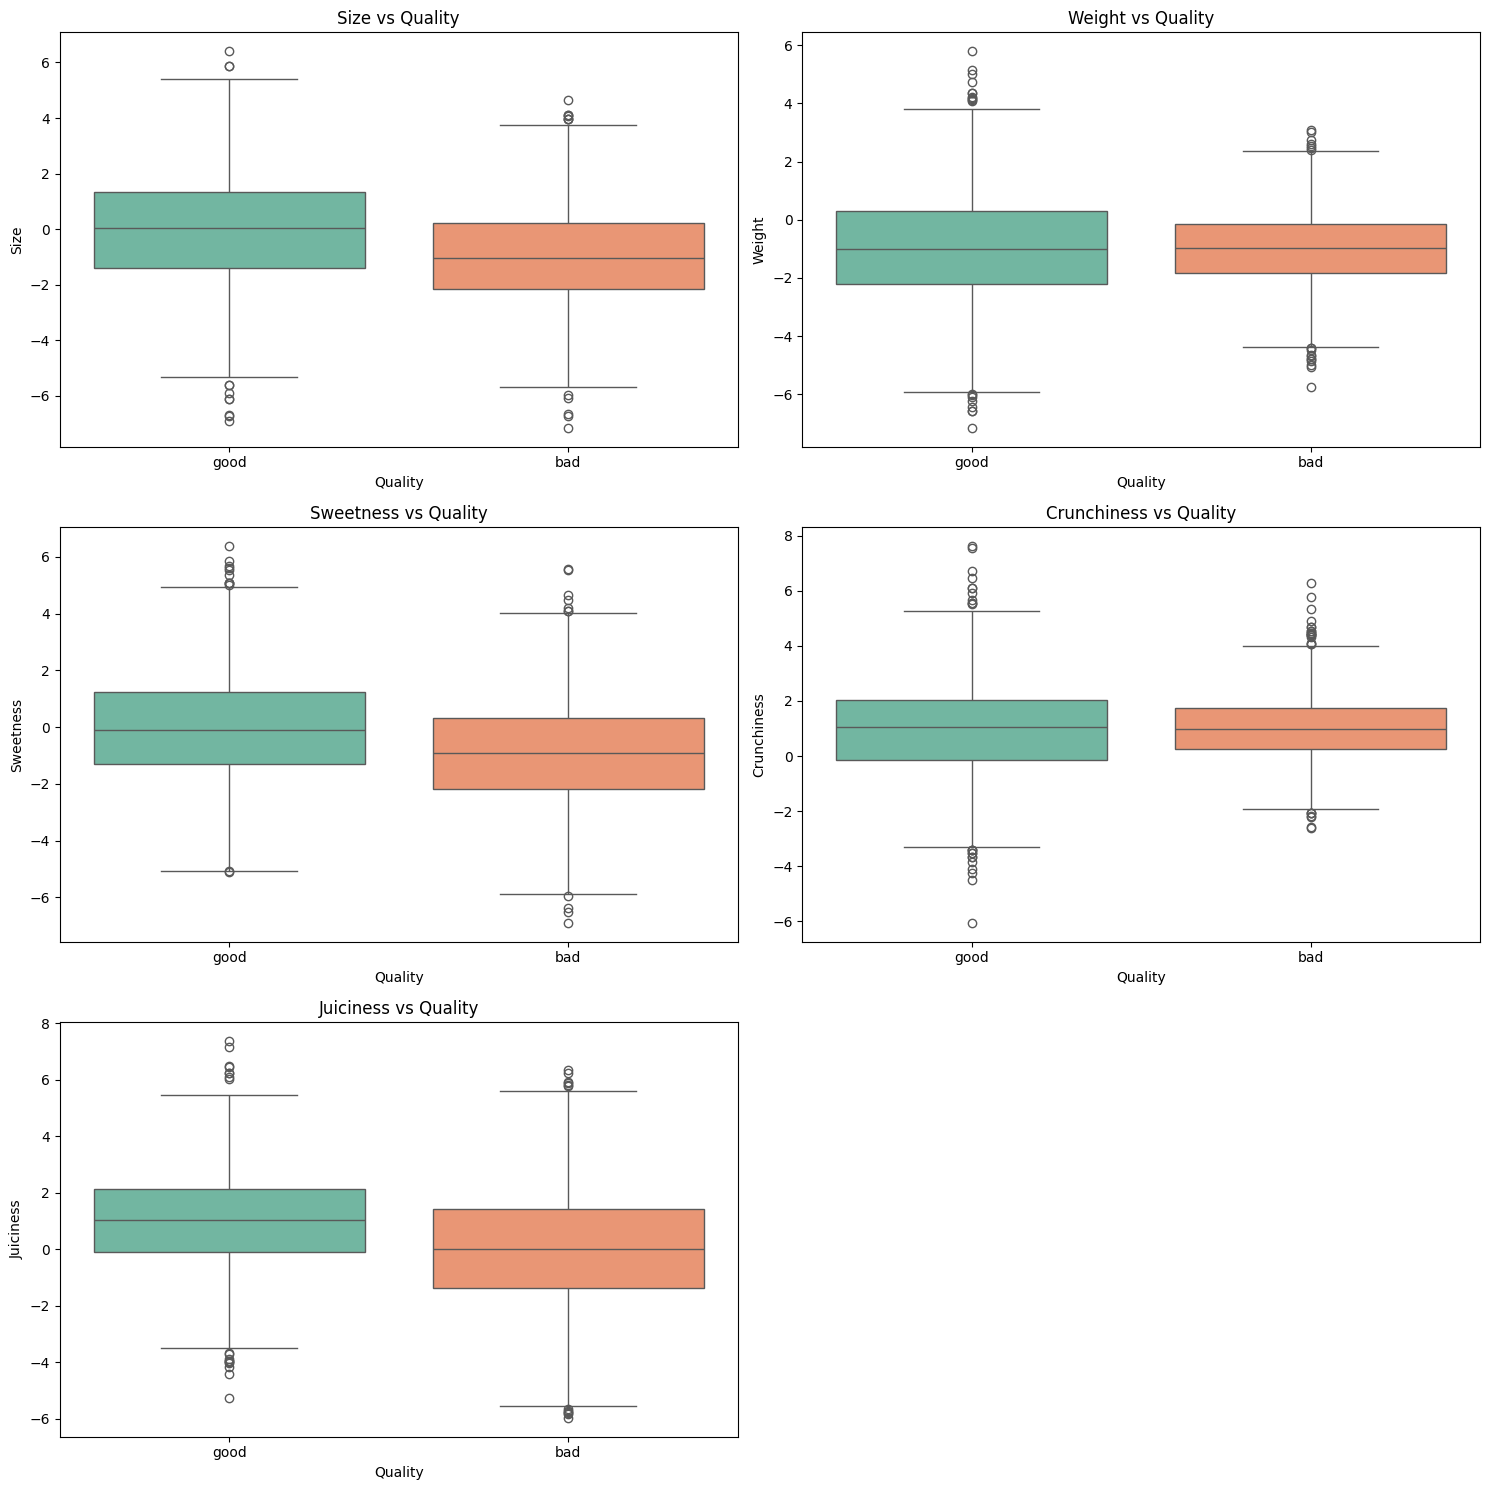

In [12]:
# Преобразование 'Acidity' в числовой формат (ошибки заменяются на NaN)
data['Acidity'] = pd.to_numeric(data['Acidity'], errors='coerce')

# Выбор переменных для анализа
variables = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness']
target = 'Quality'

# Удаление пропущенных значений
data = data.dropna(subset=[target] + variables)

# Построение графиков
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.boxplot(data=data, x=target, y=var, ax=axes[i], palette="Set2")
    axes[i].set_title(f'{var} vs {target}')
    axes[i].set_xlabel(target)
    axes[i].set_ylabel(var)

# Удаление лишней оси, если переменных меньше шести
if len(variables) < 6:
    fig.delaxes(axes[-1])

# Настройка оформления
plt.tight_layout()
plt.show()